In [2]:
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

#import opencv as cv2

img_array = np.load('test_images.npy',encoding='latin1')

images = np.load('train_images.npy',encoding='latin1')

In [4]:
import csv
def readCSV(path):
    with open(path) as csv_file:
        result = []
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            line =[]
            for data in row:
                line.append(data)
            result.append(line)
    return result


This function will give an median filter of size r for images

In [24]:
def pre_medain(image1,r):
    from scipy.ndimage.filters import median_filter
    after = median_filter(image1,size=r)
    plt.imshow(after)
    cv2.imwrite('tempaftermedian.jpg',after)
    return after


(10000, 10000)


This function applied N-largest contour for given image

In [23]:
def largestContour(N,image1):
    img = cv2.imwrite('temp.jpg',image1)
    img = cv2.imread('temp.jpg',0)
    edges = cv2.Canny(img, 0, 100)
    #plt.imshow(edges)

    im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:N]


    mask=np.zeros(img.shape)
    cv2.drawContours(mask, cnts, -1, (255),1)
    return mask


(10000, 10000)


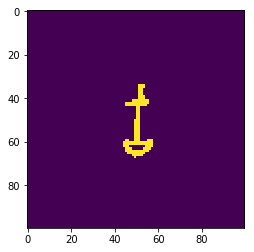

In [42]:
input=[]
for i in range(len(images)):
    image1 = (images[i][1]).reshape(100,100)
    mask=largestContour(3,image1)
    input.append(mask)
    
plt.imshow(input[0])

In [44]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
labels = np.loadtxt('train_labels.csv',dtype=str, encoding='latin1',delimiter=',')
input=[]
for i in range(len(images)):
    image1 = (images[i][1]).reshape(100,100)
    mask=
    input.append(mask)
    
plt.imshow(input[0])
X = [x.reshape(10000,) for x in input]
y = labels[1:,1]
c = [0.00001,0.0001,0.001,0.01,0.01,0.1,1,10]
for i in range(len(c)):
    clf = LinearSVC(C=c[i])
    clf.fit(X[:8000],y[:8000])
    print(metrics.accuracy_score(X[8000:], clf.predict(y[8000:])))


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3035
0.3985
0.433
0.4055
0.4055
0.35
0.2805
0.26


In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
labels = np.loadtxt('train_labels.csv',dtype=str, encoding='latin1',delimiter=',')

input=[]
for i in range(len(images)):
    image1 = (images[i][1]).reshape(100,100)
    mask=pre_medain(image1,4)
    input.append(mask)
    
    
X = [x.reshape(10000,) for x in input]

c = [0.00001,0.0001,0.001,0.01,0.01,0.1,1,10]
for i in range(len(c)):
    clf = LinearSVC(C=c[i])
    clf.fit(X[:8000],y[:8000])
    print(metrics.accuracy_score(y[8000:], clf.predict(X[8000:])))


0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03


In [51]:
input=[]
for i in range(len(images)):
    image1 = (images[i][1]).reshape(100,100)
    input.append(image1)
    

labels = np.loadtxt('train_labels.csv',dtype=str, encoding='latin1',delimiter=',')
X = [x.reshape(10000,) for x in input]
y = labels[1:,1]
c = [0.00001,0.0001,0.001,0.01,0.01,0.1,1,10]
for i in range(len(c)):
    clf = LinearSVC(C=c[i])
    clf.fit(X[:8000],y[:8000])
    print(metrics.accuracy_score(y[8000:], clf.predict(X[8000:])))


0.039
0.039
0.039
0.039
0.039
0.039
0.039
0.039
